In [ ]:
'''
@Author: Ayur Ninawe
@Date: 28-09-2021
@Last Modified by: Ayur Ninawe
@Last Modified time: 28-09-2021
@Title : Program to process facebook data using spark, pandas and plotting data.
'''

In [14]:
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession,SQLContext
from pyspark.sql.functions import *


spark = SparkSession.builder.master("local").appName('operations').getOrCreate()
sc=spark.sparkContext
from pyspark.sql import *

2021-09-29 19:32:43,726 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
2021-09-29 19:32:47,777 WARN util.Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [15]:
facebook_data_df = spark.read.format("csv").option("header", "true" ).load("hdfs://localhost:9000/user/ayur/pseudo_facebook.csv",inferSchema=True)

In [17]:
facebook_data_df.count()

99003

In [18]:
facebook_data_df.head(3)

[Row(userid=2094382, age=14, dob_day=19, dob_year=1999, dob_month=11, gender='male', tenure='266', friend_count=0, friendships_initiated=0, likes=0, likes_received=0, mobile_likes=0, mobile_likes_received=0, www_likes=0, www_likes_received=0),
 Row(userid=1192601, age=14, dob_day=2, dob_year=1999, dob_month=11, gender='female', tenure='6', friend_count=0, friendships_initiated=0, likes=0, likes_received=0, mobile_likes=0, mobile_likes_received=0, www_likes=0, www_likes_received=0),
 Row(userid=2083884, age=14, dob_day=16, dob_year=1999, dob_month=11, gender='male', tenure='13', friend_count=0, friendships_initiated=0, likes=0, likes_received=0, mobile_likes=0, mobile_likes_received=0, www_likes=0, www_likes_received=0)]

In [19]:
facebook_data_df.select(['userid','age']).show()

+-------+---+
| userid|age|
+-------+---+
|2094382| 14|
|1192601| 14|
|2083884| 14|
|1203168| 14|
|1733186| 14|
|1524765| 14|
|1136133| 13|
|1680361| 13|
|1365174| 13|
|1712567| 13|
|1612453| 13|
|2104073| 13|
|1918584| 13|
|1704433| 13|
|1932519| 13|
|1751722| 13|
|1470850| 13|
|1001768| 13|
|1537661| 13|
|1020296| 13|
+-------+---+
only showing top 20 rows



In [16]:
facebook_data_df.printSchema()

root
 |-- userid: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- dob_day: integer (nullable = true)
 |-- dob_year: integer (nullable = true)
 |-- dob_month: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- tenure: string (nullable = true)
 |-- friend_count: integer (nullable = true)
 |-- friendships_initiated: integer (nullable = true)
 |-- likes: integer (nullable = true)
 |-- likes_received: integer (nullable = true)
 |-- mobile_likes: integer (nullable = true)
 |-- mobile_likes_received: integer (nullable = true)
 |-- www_likes: integer (nullable = true)
 |-- www_likes_received: integer (nullable = true)



# Analysing And Visualization Using Matplotlib and Pandas

## Age group analysis

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as  plt
plt.style.use("fivethirtyeight")
facebook_data = pd.read_csv("pseudo_facebook.csv")

In [3]:
facebook_data["gender"].value_counts(dropna=False)

male      58574
female    40254
NaN         175
Name: gender, dtype: int64

In [4]:
fb_data = facebook_data.interpolate(method="pad",limit=1) 
fb_data["gender"].value_counts(dropna=False)
# 175//2

male      58662
female    40341
Name: gender, dtype: int64

## min age is 13 and max is 113 so we will take 10 as lowerbound and 120 as upperbound for creating age groups

In [13]:
min(fb_data['age']), max(fb_data['age'])
lables = ['10-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','101-110','111-120']
fb_data['age_group'] = pd.cut(fb_data['age'], bins = np.arange(10, 121, 10), labels = lables, right=True)
fb_data.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,10-20
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,10-20
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,10-20
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,10-20
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,10-20


## PLOTTING HISTOGRAM FOR AGE GROUPS


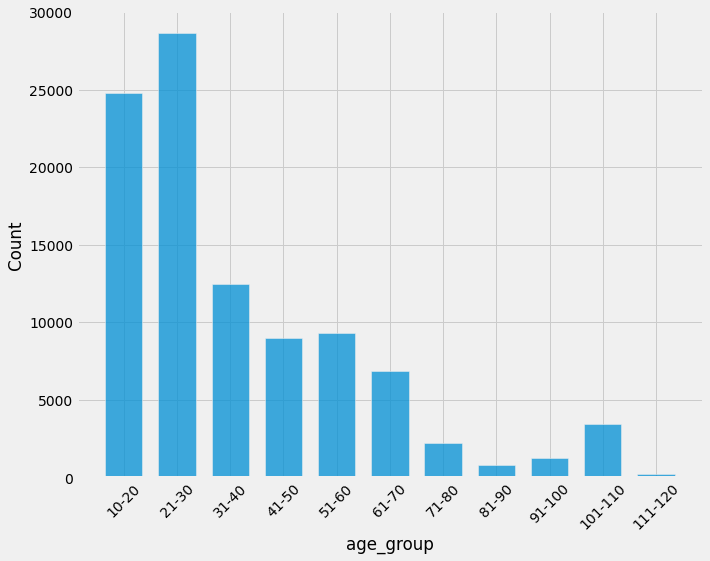

In [6]:
# age group vs count histogram
plt.subplots(figsize = (10,8))
sns.histplot(fb_data, x = 'age_group',shrink = 0.7,fill="gender")
plt.xticks(rotation=45)
plt.show()

# Gender wise analysis

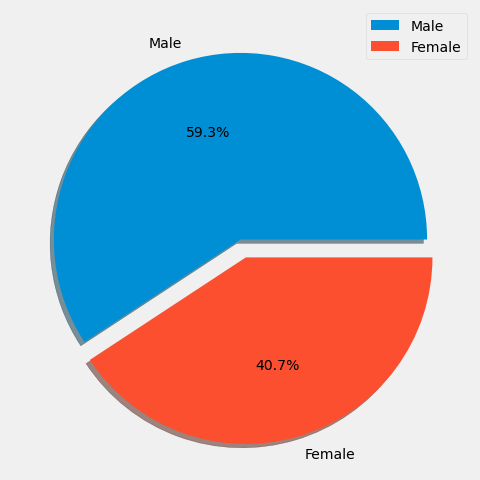

In [7]:
gender_counts = fb_data['gender'].value_counts()
plt.subplots(figsize=(10,8))
explode = [0,0.1]
plt.pie(gender_counts, labels = ['Male','Female'], autopct='%1.1f%%',explode=explode,shadow=True)
plt.legend()
plt.show()

<AxesSubplot:title={'center':'gender_counts'}>

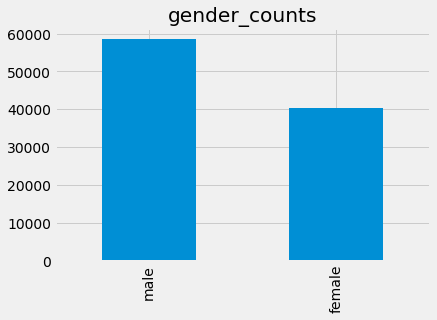

In [8]:
fb_data["gender"].value_counts().plot.bar(title = "gender_counts")

# LIKES COUNTS BY GENDER

In [9]:
df1 = fb_data.groupby(["gender"])["likes_received"].sum()
df1

gender
female    10133943
male       3992732
Name: likes_received, dtype: int64

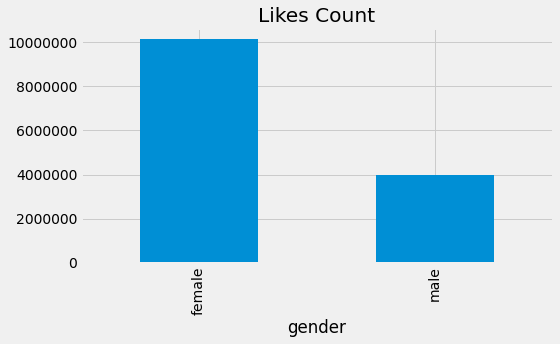

In [10]:
f = plt.figure(figsize=(8,5))
plt.ticklabel_format(style = 'plain')
df1.plot.bar()
plt.title("Likes Count")
plt.tight_layout()

# Inactive user 

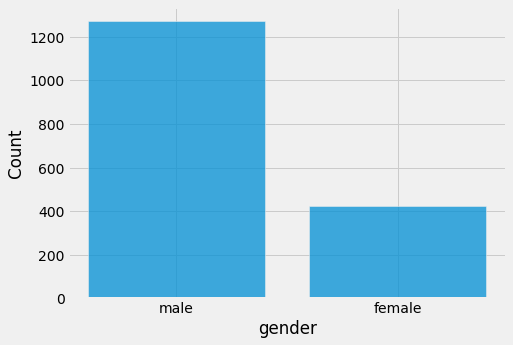

In [11]:
inactive_users = fb_data.query('friend_count == 0 and friendships_initiated == 0 and likes == 0')
plt.subplots(figsize = (7,5))
sns.histplot(data = inactive_users, x = 'gender', shrink = 0.8)
plt.show()

# Web users and mobile users

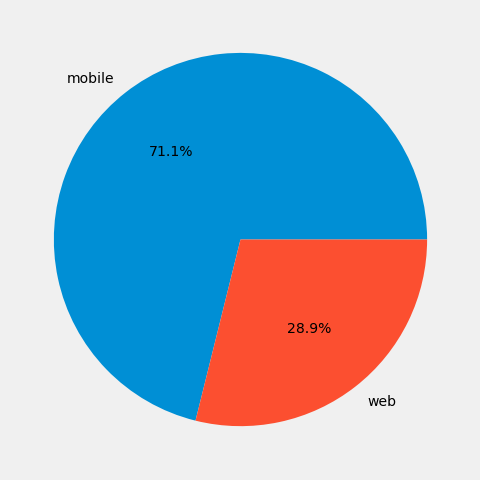

In [12]:
# first get all the active users
active_users = fb_data.query("friendships_initiated !=0 and likes != 0").reset_index(drop=True)

# get wich platform they are using
active_users['use_method'] = (active_users['mobile_likes'] >= active_users['www_likes']).replace({True : 'mobile', False : 'web'})
active_users
# plot it
plt.subplots(figsize = (10,8))
plt.pie(active_users['use_method'].value_counts(), labels = ['mobile','web'], autopct='%1.1f%%')
plt.show()